# Базовый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 1.1

Загрузите первый лист (`curr`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [1]:
import pandas as pd
import numpy as np
curr=pd.read_excel('data.xlsx', sheetname='curr')
curr

,Date,USD,EUR
0,2013-06-22,32.7433,43.3489
1,2013-06-25,32.9097,43.1018
2,2013-06-26,32.7140,42.9698
3,2013-06-27,32.8876,42.9841
4,2013-06-28,32.8766,42.8349
5,2013-06-29,32.7090,42.7180
6,2013-07-02,32.8517,42.8025
7,2013-07-03,32.9475,43.0525
8,2013-07-04,33.2204,43.0736
9,2013-07-05,33.1605,43.0954


## Задание 1.2

Выведите на экран тип поля `Date`. Если это `datetime64[ns]` или `<M8[ns]` (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу `datetime`.

In [3]:
type(curr.Date.iloc[15])

pandas.tslib.Timestamp

In [5]:
curr.Date.apply(lambda x: type(x)).value_counts()

<class 'pandas.tslib.Timestamp'>    988
Name: Date, dtype: int64

In [6]:
curr.dtypes

Date    datetime64[ns]
USD            float64
EUR            float64
dtype: object

## Задание 1.3

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (*Hint: даты можно вычитать друг из друга*)

In [224]:
print str(curr.Date.min()) + ' - minimal'
print str(curr.Date.max()) + ' - maximal'
print str(curr.Date.max() - curr.Date.min()).split(' 0')[0]

2013-06-22 00:00:00 - minimal
2017-06-21 00:00:00 - maximal
1460 days


## Задание 1.4

Постройте на одном графике курс доллара и курс евро.

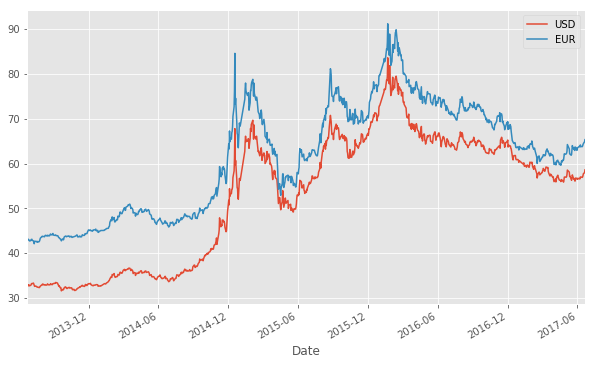

In [70]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')
curr.set_index('Date')[['USD', 'EUR']].plot()

## Задание 1.5

Найдите среднее значение курса евро в мае 2017 года.

In [20]:
curr.set_index('Date').loc['2017-05-01':'2017-05-31', 'EUR'].mean()

62.95527368421053

# Продвинутый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 2.1

Найдите долю дней, когда доллар растет.

In [24]:
curr.sort_values('Date', ascending=True, inplace=True)

In [225]:
curr['date_shift']=curr.USD/curr.USD.shift()-1
(curr.date_shift>0).mean()

0.52631578947368418

## Задание 2.2

Постройте гистограмму доходности доллара.

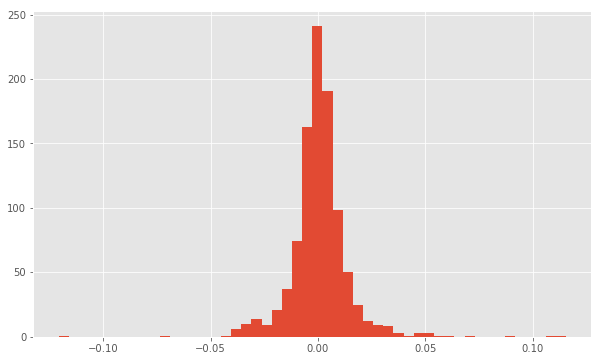

In [49]:
curr.date_shift.hist(bins=50)

## Задание 2.3

Добавьте в таблицу новую колонку `Weekday` – день недели на русском языке, т.е. строку со значением `u'понедельник'`, `u'вторник'` и т.д. (*Hint: удобно воспользоваться атрибутом* `.dt`)

In [56]:
dic={0: u'понедельник', 1: u'вторник', 2: u'среда', 3: u'четверг', 4: u'пятница', 5: u'суббота', 6: u'воскресенье'}
curr['Weekday']=curr.Date.dt.weekday.apply(lambda x: dic[x])
curr.tail(10)

,Date,USD,EUR,date_shift,Weekday
978,2017-06-07,56.6747,63.7817,0.001051,среда
979,2017-06-08,56.5878,63.7179,-0.001533,четверг
980,2017-06-09,56.9857,64.1488,0.007032,пятница
981,2017-06-10,57.0020,63.7852,0.000286,суббота
982,2017-06-14,56.9096,63.7729,-0.001621,среда
983,2017-06-15,57.0303,63.9481,0.002121,четверг
984,2017-06-16,57.4437,64.2795,0.007249,пятница
985,2017-06-17,57.7408,64.4561,0.005172,суббота
986,2017-06-20,57.9585,64.8614,0.003770,вторник
987,2017-06-21,58.5786,65.3210,0.010699,среда


## Задание 2.4

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (*Hint: в pandas уже встроена функция для расчета корреляций*).

In [63]:
curr.corr(method='pearson').loc['USD','EUR']

0.98230892515582702

## Задание 2.5

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

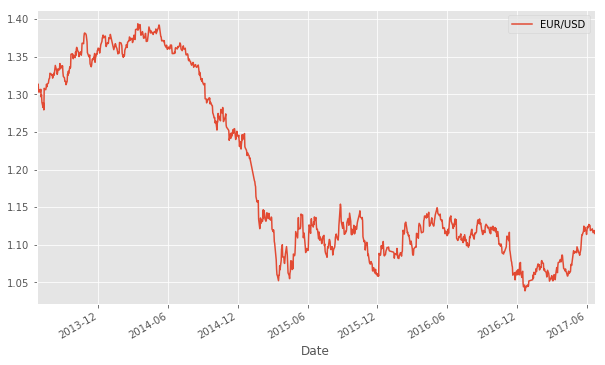

In [80]:
curr['EUR/USD']=curr.EUR / curr.USD
curr.plot(x='Date', y='EUR/USD')

# Сложный уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 3.1

Загрузите второй лист (`oil`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены цены за баррель нефти Brent в долларах США).

In [81]:
oil=pd.read_excel('data.xlsx', sheetname='oil')
oil.sample(10)

,dt,Brent
577,2015-04-15,59.32
532,2015-02-10,55.79
490,2014-12-09,66.11
535,2015-02-13,60.33
657,2015-08-06,47.80
281,2014-02-12,108.62
267,2014-01-23,109.69
851,2016-05-10,44.01
691,2015-09-23,48.00
806,2016-03-07,39.02


In [82]:
oil.dtypes

dt       datetime64[ns]
Brent           float64
dtype: object

## Задание 3.2

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля `USD` (доллар), `EUR` (евро) и `Brent` (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

In [99]:
all_ind=pd.merge(curr, oil, how='inner', left_on='Date', right_on='dt').loc[:,['Date','USD','EUR','Brent']]
all_ind.set_index('Date',inplace=True)
all_ind.sort_index().head(5)

,USD,EUR,Brent
Date,,,
2013-06-25,32.9097,43.1018,101.51
2013-06-26,32.7140,42.9698,100.62
2013-06-27,32.8876,42.9841,102.74
2013-06-28,32.8766,42.8349,102.49
2013-07-02,32.8517,42.8025,103.96


## Задание 3.3

- Постройте на одном графике курсы валют и цены не нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр `secondary_y='Brent'` для отображения дополнительной оси $y$ справа.
- Посчитайте попарные корреляции всех трех временных рядов за весь период.

,USD,EUR,Brent
USD,1.000000,0.982142,-0.978950
EUR,0.982142,1.000000,-0.938919
Brent,-0.978950,-0.938919,1.000000


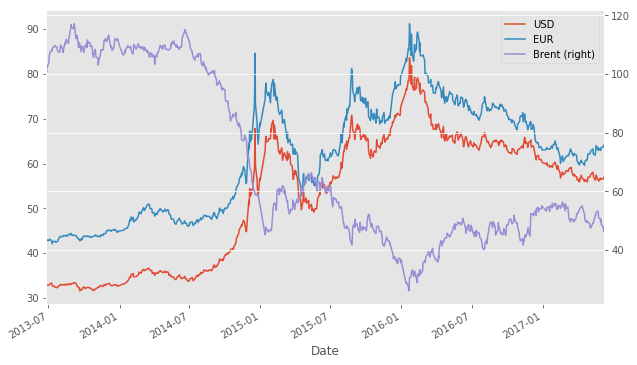

In [101]:
all_ind.plot(secondary_y='Brent')
all_ind.corr(method='pearson')

## Задание 3.4

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

In [146]:
all_ind['eur_shift']=(all_ind.EUR/all_ind.EUR.shift()-1)*100
all_ind['Weekday']=all_ind.index.weekday
all_ind['Weekday_']=all_ind.Weekday.apply(lambda x: dic[x])
aa=all_ind.groupby('Weekday_').eur_shift.mean()
all_ind.drop(['Weekday', 'eur_shift'], axis=1, inplace=True)
aa.sort_values(ascending=False)

Weekday_
вторник    0.329266
среда      0.083842
четверг    0.021186
пятница   -0.167353
Name: eur_shift, dtype: float64

Судя по всему, в общем случае лучше всего покупать в пятницу, ждать роста цены все дни до четверга и продавать в четверг.  
Также можно в четверг открывать короткую позицию и закрывать ее в пятницу.

## Задание 3.5

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.

In [240]:
all_ind.reset_index(inplace=True)
all_ind['row_num']=all_ind.index
all_ind.tail(5)

,Date,USD,EUR,Brent,Weekday_,row_num
767,2017-06-02,56.5373,63.5310,48.46,пятница,767
768,2017-06-06,56.6152,63.8110,48.11,вторник,768
769,2017-06-07,56.6747,63.7817,47.08,среда,769
770,2017-06-08,56.5878,63.7179,46.30,четверг,770
771,2017-06-09,56.9857,64.1488,46.64,пятница,771


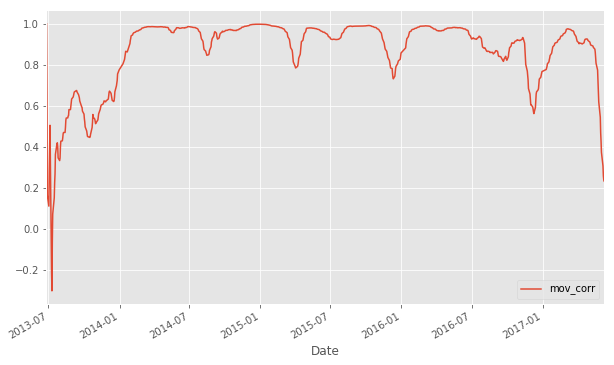

In [241]:
def mov_c(row):
    a=row['row_num']
    if a<60: # если предыдущих значений меньше 60, берем все предыдущие; если нет - последние 60 значений
        return all_ind.loc[:a, ['USD','EUR']].corr().loc['USD','EUR']
    else:
        return all_ind.loc[a-60+1:a, ['USD','EUR']].corr().loc['USD','EUR']
all_ind['mov_corr']=all_ind.apply(mov_c, axis=1)
all_ind.plot(x='Date', y='mov_corr')